# Investigating Proper Motion of Known Globuluar Clusters
- This notebook aims to determine the typical proper motion of known globuluar clusters using Vasiliev, 2019 `Proper motions and dynamics of the Milky Way globular cluster system from Gaia DR2`.

- This is in an aim to further filter the gaia data during query to identify Halo substructures

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import votable
from astropy.table import Table
from astropy.io import fits

In [16]:
# Loading the data
PMGC_path = 'data/PMGC_vasiliev2019.fit'
with fits.open(PMGC_path) as PMGC_hdul:
    PMGC_data = Table(PMGC_hdul[1].data).to_pandas()
    display(PMGC_data.describe())

,RAJ2000,DEJ2000,Dist,HRV,e_HRV,pmRA,pmDE,e_pmRA,e_pmDE,corr,Rscale,Nstar,recno
count,150.000000,150.000000,149.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,239.400421,-22.539160,16.197315,-1.674535,1.006200,-1.802960,-3.588580,0.067213,0.066013,-0.000333,3.947333,1211.093333,75.500000
std,67.988785,26.742607,21.388643,140.881683,1.831912,3.194479,3.522490,0.025633,0.022090,0.062978,3.478056,3153.796477,43.445368
min,6.024000,-82.213997,2.200000,-406.220001,0.080000,-12.490000,-19.000999,0.039000,0.039000,-0.471000,0.400000,9.000000,1.000000
25%,230.229252,-36.475250,7.200000,-93.882500,0.280000,-3.800500,-5.328000,0.057000,0.057000,-0.001000,1.825000,94.000000,38.250000
50%,261.578003,-26.310500,9.400000,-4.860000,0.515000,-2.025500,-3.023000,0.063000,0.063000,0.005500,2.800000,241.500000,75.500000
75%,272.970505,-7.691250,15.600000,81.034998,1.055000,-0.065250,-1.428500,0.068000,0.067000,0.012750,5.200000,917.000000,112.750000
max,347.110992,79.581001,145.000000,494.339996,14.140000,9.833000,7.115000,0.288000,0.184000,0.167000,25.200001,23917.000000,150.000000


In [17]:
# Calculate the absolute values
PMGC_data['abs_pmRA'] = PMGC_data['pmRA'].abs()
PMGC_data['abs_pmDE'] = PMGC_data['pmDE'].abs()
PMGC_data['pm_total'] = np.sqrt(PMGC_data['pmRA']**2 + PMGC_data['pmDE']**2)

In [18]:
potential_pm_limit = 12

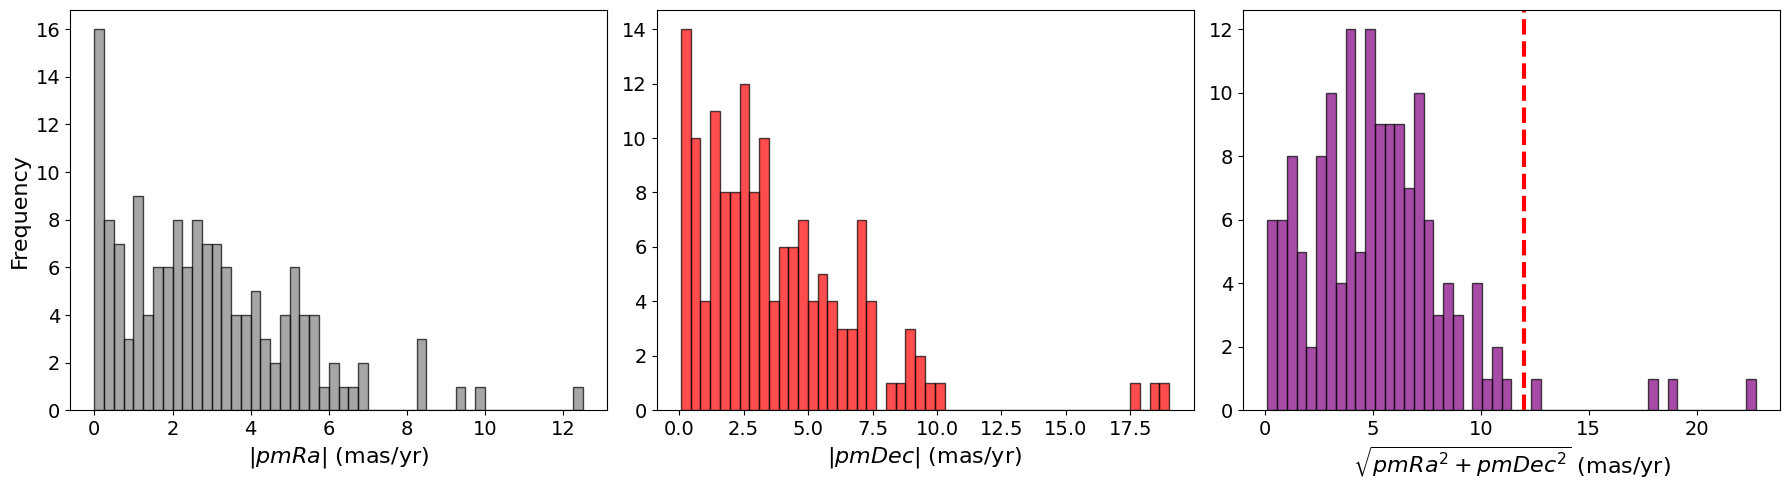

In [19]:
# Plot histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(PMGC_data['abs_pmRA'], bins=50, color='grey', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('$|pm Ra|$ (mas/yr)', fontsize=16)
axes[0].set_ylabel('Frequency', fontsize=16)
axes[0].tick_params(axis='both', which='major', labelsize=14)

axes[1].hist(PMGC_data['abs_pmDE'], bins=50, color='red', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('$|pm Dec|$ (mas/yr)', fontsize=16)
axes[1].tick_params(axis='both', which='major', labelsize=14)

axes[2].hist(PMGC_data['pm_total'], bins=50, color='purple', alpha=0.7, edgecolor='black')
axes[2].set_xlabel('$\sqrt{pm Ra^2 + pm Dec^2}$ (mas/yr)', fontsize=16)
axes[2].tick_params(axis='both', which='major', labelsize=14)
axes[2].axvline(potential_pm_limit, color='red', linestyle='dashed', linewidth=3)

plt.tight_layout()
plt.show()

In [20]:
# Summary table
summary_stats_pm = {
    'Statistic': ['Mean', 'Median', 'Max', 'Standard Deviation'],
    '|pmRA|': [
        PMGC_data['abs_pmRA'].mean(),
        PMGC_data['abs_pmRA'].median(),
        PMGC_data['abs_pmRA'].max(),
        PMGC_data['abs_pmRA'].std()
    ],
    r'|pmDE|': [
        PMGC_data['abs_pmDE'].mean(),
        PMGC_data['abs_pmDE'].median(),
        PMGC_data['abs_pmDE'].max(),
        PMGC_data['abs_pmDE'].std()
    ],
    r'\sqrt{pmRA^2 + pmDE^2}': [
        PMGC_data['pm_total'].mean(),
        PMGC_data['pm_total'].median(),
        PMGC_data['pm_total'].max(),
        PMGC_data['pm_total'].std()
    ]
}

summary_stats_pm_df = pd.DataFrame(summary_stats_pm)
display(summary_stats_pm_df)

,Statistic,|pmRA|,|pmDE|,\sqrt{pmRA^2 + pmDE^2}
0,Mean,2.876000,3.830193,5.196834
1,Median,2.572500,3.085500,5.028615
2,Max,12.490000,19.000999,22.738472
3,Standard Deviation,2.269425,3.256291,3.414836
